In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('brain_tumor_dataset.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [4]:
df.shape

(20000, 19)

In [5]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [7]:
df['Tumor_Type'].value_counts()           ## 1. Malignant 2. Benign

Tumor_Type
Malignant    10030
Benign        9970
Name: count, dtype: int64

In [8]:
df['Location'].value_counts()       ## 1. Occipital 2. Frontal 3. Temporal 4. Parietal

Location
Temporal     5118
Parietal     4990
Occipital    4967
Frontal      4925
Name: count, dtype: int64

In [9]:
df['Histology'].value_counts()     ## 1 Glioma, 2 Medulloblastoma, 3 Astrocytoma, 4 Meningioma

Histology
Glioblastoma       5068
Meningioma         5016
Medulloblastoma    4979
Astrocytoma        4937
Name: count, dtype: int64

In [10]:
df['Stage'].value_counts()

Stage
II     5093
I      4986
IV     4968
III    4953
Name: count, dtype: int64

In [11]:
df['Symptom_1'].value_counts() 

Symptom_1
Headache         5045
Seizures         5028
Nausea           4969
Vision Issues    4958
Name: count, dtype: int64

In [12]:
df['Symptom_2'].value_counts() 

Symptom_2
Seizures         5054
Vision Issues    5019
Headache         4996
Nausea           4931
Name: count, dtype: int64

In [13]:
df['Symptom_3'].value_counts() 

Symptom_3
Seizures         5027
Nausea           5012
Vision Issues    5007
Headache         4954
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [15]:
en1 = OrdinalEncoder()
en2 = OneHotEncoder(sparse_output=False)

In [16]:
df.sample()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
5553,5554,35,Male,Benign,9.867587,Parietal,Medulloblastoma,IV,Seizures,Seizures,Headache,Yes,Yes,No,88.769326,1.380947,No,Positive,No


In [17]:
en1.fit_transform(df[['Tumor_Type', 'Location', 'Histology', 'Stage','Radiation_Treatment','Surgery_Performed','Chemotherapy','Family_History','MRI_Result','Follow_Up_Required']])

en1.categories_

[array(['Benign', 'Malignant'], dtype=object),
 array(['Frontal', 'Occipital', 'Parietal', 'Temporal'], dtype=object),
 array(['Astrocytoma', 'Glioblastoma', 'Medulloblastoma', 'Meningioma'],
       dtype=object),
 array(['I', 'II', 'III', 'IV'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Negative', 'Positive'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [18]:
en2.fit_transform(df[['Gender','Symptom_1','Symptom_2','Symptom_3']])

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(20000, 14))

In [19]:
pd.DataFrame(en1.fit_transform(df[['Tumor_Type', 'Location', 'Histology', 'Stage','Radiation_Treatment','Surgery_Performed','Chemotherapy','Family_History','MRI_Result','Follow_Up_Required']]), columns=en1.get_feature_names_out(['Tumor_Type', 'Location', 'Histology', 'Stage','Radiation_Treatment','Surgery_Performed','Chemotherapy','Family_History','MRI_Result','Follow_Up_Required']))

,Tumor_Type,Location,Histology,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Family_History,MRI_Result,Follow_Up_Required
0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
19995,1.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
19996,0.0,3.0,3.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0
19997,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
19998,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0


In [20]:
pd.DataFrame(en2.fit_transform(df[['Gender','Symptom_1','Symptom_2','Symptom_3']]), columns=en2.get_feature_names_out(['Gender','Symptom_1','Symptom_2','Symptom_3']))

,Gender_Female,Gender_Male,Symptom_1_Headache,Symptom_1_Nausea,Symptom_1_Seizures,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
19998,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
pd.concat([df[['Patient_ID','Age','Tumor_Size','Survival_Rate','Tumor_Growth_Rate']],pd.DataFrame(en1.fit_transform(df[['Tumor_Type', 'Location', 'Histology', 'Stage','Radiation_Treatment','Surgery_Performed','Chemotherapy','Family_History','MRI_Result','Follow_Up_Required']]), columns=en1.get_feature_names_out(['Tumor_Type', 'Location', 'Histology', 'Stage','Radiation_Treatment','Surgery_Performed','Chemotherapy','Family_History','MRI_Result','Follow_Up_Required'])), pd.DataFrame(en2.fit_transform(df[['Gender','Symptom_1','Symptom_2','Symptom_3']]), columns=en2.get_feature_names_out(['Gender','Symptom_1','Symptom_2','Symptom_3']))], axis=1)

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Tumor_Type,Location,Histology,Stage,Radiation_Treatment,...,Symptom_1_Seizures,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues
0,1,73,5.375612,51.312579,0.111876,1.0,3.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,26,4.847098,46.373273,2.165736,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,31,5.588391,47.072221,1.884228,0.0,2.0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,29,1.436600,51.853634,1.283342,1.0,3.0,2.0,3.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,54,2.417506,54.708987,2.069477,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,9.612013,58.229662,0.353806,1.0,2.0,2.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,19997,32,1.543560,77.706856,2.341074,0.0,3.0,3.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19997,19998,57,3.618634,89.543803,2.332881,0.0,3.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
19998,19999,68,8.519086,83.306781,2.387202,1.0,2.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

D:\Temp\ipykernel_4916\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

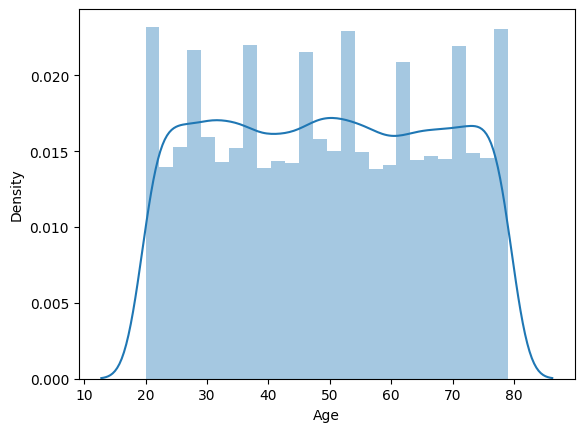

In [30]:
sns.distplot(df['Age'])

In [31]:
df.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,49.433700,5.236552,70.131699,1.547701
std,5773.647028,17.389296,2.754359,17.270834,0.835995
min,1.000000,20.000000,0.500410,40.002386,0.100017
25%,5000.750000,34.000000,2.836686,55.224439,0.830433
50%,10000.500000,49.000000,5.200675,70.305066,1.541821
75%,15000.250000,65.000000,7.624299,85.043395,2.262484
max,20000.000000,79.000000,9.999420,99.998125,2.999835
